---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

In [1]:
import pandas as pd
import numpy as np

# A distribution is just a shape that describes the probability of a value being pulled when we sample a population

In [2]:
# sample 1 time and the chance that you get a zero (heads)
np.random.binomial(1, 0.5)

1

In [3]:
# half the time we have a head and half the time we get a tail
np.random.binomial(1000, 0.5)/1000

0.512

Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. Use np.random.binomial(n, p, size) to do 10000 simulations of flipping a fair coin 20 times, then see what proportion of the simulations are 15 or greater.

In [3]:
x = np.random.binomial(20, .5, 10000)
print((x>=15).mean())

0.0193


In [4]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

In [5]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
# sampling the distribution    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

106 tornadoes back to back in 2739.72602739726 years


In [4]:
# Normal distribution, called gaussian or normal distribution
np.random.uniform(0, 1)

0.8273100518983405

Note--The expected value is the probability from the underlying distribution. It is what would be the mean of a die roll if we did an infinite number of rolls.  The mean value depends upon the samples that we've taken, and converges to the expected value given a sufficiently large sample set.

Variance--how spread out the values are from the mean.


In [5]:
np.random.normal(0.75)

0.9655641702215284

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

In [6]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.98871139422107002

In [7]:
np.std(distribution)

0.98871139422107002

In [8]:
import scipy.stats as stats
# The shape of the tales of the distribution and this is called the kurtosis
# A negative value means the curve is slightly more flat than a normal distribution, 
# and a positive value means the curve is slightly more peaky than a normal distribution. 

stats.kurtosis(distribution)

-0.09373372739250296

In [9]:
stats.skew(distribution)

0.07737556282396506

In [14]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

1.9300577565496124

In [15]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.2912796257785983

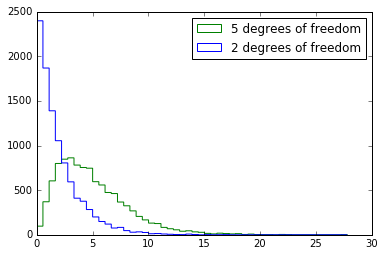

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


# Hypothesis Testing

In [17]:
df = pd.read_csv('grades.csv')

In [18]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


In [17]:
len(df)

2315

In [19]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

In [20]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

In [21]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

For hypothesis testing, we choose a significance level as a threshold for how much of a chance we're will to accept.  The significance level is called alpha. A value of 0.05 or 0.01 is often used, which indicates a tolerance for a probability of between 5% and 1% of chance. When we set the alpha to be 0.05, we're saying that we expect it that there will be a positive result, 5% of the time just due to chance. At a confidence level of 0.05, we expect to find one positive result 1 out of 20 tests.

In [22]:
from scipy import stats
stats.ttest_ind?

In [23]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])
# compares whether difference found in 2 means, result is a tuple with t-stat and p-value
# no statistical difference between the 2 means

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

In [24]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

In [25]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

Remedy for p-hacking (doing many tests until you find one which is of statistical significance)
1. Bonferroni correction
2. Hold-out sets
3. Investigation pre-registration